In [1]:
from sklearn.datasets import load_iris
iris = load_iris(); iris
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
X = iris.data
y = iris.target

X.shape

(150, 4)

In [19]:
{1, 1, 2}

{1, 2}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [23]:
import pandas as pd
train = pd.read_csv('./data/house/train.csv')
test = pd.read_csv('./data/house/test.csv')

## Data fields
### ID : 집을 구분하는 번호
### date : 집을 구매한 날짜
### price : 집의 가격(Target variable)
### bedrooms : 침실의 수
### bathrooms : 화장실의 수
### sqft_living : 주거 공간의 평방 피트(면적)
### sqft_lot : 부지의 평방 피트(면적)
### floors : 집의 층 수
### waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
### view : 집이 얼마나 좋아 보이는지의 정도
### condition : 집의 전반적인 상태
### grade : King County grading 시스템 기준으로 매긴 집의 등급
### sqft_above : 지하실을 제외한 평방 피트(면적)
### sqft_basement : 지하실의 평방 피트(면적)
### yr_built : 지어진 년도
### yr_renovated : 집을 재건축한 년도
### zipcode : 우편번호
### lat : 위도
### long : 경도
### sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
### sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

In [24]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [27]:
train.shape

(15035, 21)

In [29]:
test.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [31]:
train.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [36]:
X = train.drop(['price'], axis = 1)
y = train['price']

In [63]:
test.shape

(6468, 20)

In [37]:
sel = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
X_sel = X[sel]

In [40]:
from sklearn.model_selection import train_test_split
# data division
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, random_state = 42)

In [54]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

forest = RandomForestRegressor(n_estimators=50, random_state = 2)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [55]:
forest.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=1872583848, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=794921487, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2,

In [53]:
# 변수의 중요도
print(forest.feature_importances_)
# sel = ['bedrooms', 'bathrooms', 'sqft_living',b 'sqft_lot']

[0.062593   0.09979542 0.34795532 0.48965627]


C:\Users\301-1\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\301-1\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\301-1\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\301-1\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\301-1\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\301-1\AppData\Roaming\Pyth

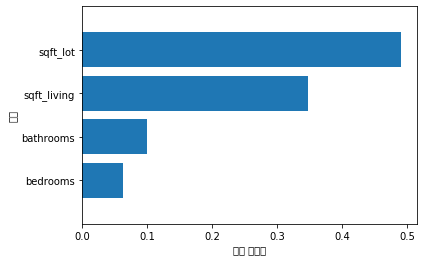

In [52]:
# 변수의 중요도 visualization
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_cancer(model, dataset):
 n_features = dataset.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), dataset.columns)
 plt.xlabel("특성 중요도")
 plt.ylabel("특성")
 plt.ylim(-1, n_features)

plot_feature_importances_cancer(forest, X_sel)

In [57]:
pred = forest.predict(X_train); pred

array([ 443260.  ,  355140.  ,  347100.  , ..., 1095386.  ,  349609.  ,
        486555.96])

In [58]:
test.shape

(6468, 20)

In [60]:
pred = forest.predict(X_test); pred

array([357289. , 354659.6, 434361. , ..., 254879. , 436549. , 429217. ])

In [62]:
pred.shape

(3759,)

In [65]:
result = forest.predict(test[sel]); result

array([ 667329. ,  412173.2, 1457180. , ...,  484410. ,  351589. ,
        397999. ])

In [67]:
## 제출
result_ = pd.DataFrame({'id': test['id'], 'price': result})
result_.to_csv('./data/house/result.csv', index = False)